<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_006_METRICAS_OUT_02_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
Hello world
I'm evolving!!!



In [2]:
!ls

000_ANN_Gera_Matriz_para_ser_usada_set_26_2019.ipynb  X_DAT_B_set_17_2019.csv
000_ANN_parte_001_XY_dados_out_01_2019.ipynb	      X_DAT_set_17_2019.csv
000_ANN_parte_002_B_D10_OUT_1_2019.ipynb	      XY_D10_out_1_2019.csv
000_Gerenciador_DE_var_F_CR_STAT_set_27_2019.ipynb    Y_DAT_B_set_17_2019.csv
imput_ANN_D10_6F.zip				      Y_DAT_set_17_2019.csv


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def tasig(x,deriv=False):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [6]:
# leitura dos dados
DAT=pd.read_csv("XY_D10_out_1_2019.csv")
# separa as colunas de interesse
Index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
#print(Dat_Select)
print(Dat_Select.head())

   DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         21.655535     1.221355       0.2         0.0      0.0  100.0   
1         21.514089     1.213378       0.3         0.0      0.0  100.0   
2         21.295827     1.201068       0.4         2.0      2.0  100.0   
3         21.188552     1.195018       0.5         0.0      0.0  100.0   
4         21.769821     1.227801       0.6         1.0      2.0  100.0   

         Fo       CRo      fmin         fmax   AD_fmin   AD_fmax         F  \
0  0.972856  0.760538  0.057549  1805.235510  1.000000  0.374682  0.277668   
1  0.277668  0.260366  0.057549   317.197512  1.000000  0.065835  0.173981   
2  0.173981  0.453169  0.022278    49.847938  0.387115  0.010346  0.677145   
3  0.677145  0.947536  0.022278    33.373213  0.387115  0.006927  0.059762   
4  0.059762  0.155327  0.014697     9.059640  0.255377  0.001880  0.949367   

         CR  
0  0.260366  
1  0.453169  
2  0.947536  
3  0.155327  
4  0.933255  


In [0]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [8]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) 
test=DAT.drop(train.index)
'''x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]'''
x_train=train.iloc[:,[1,2,3,4,6,7,10,11]]
x_test=test.iloc[:,[1,2,3,4,6,7,10,11]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,6,7,10,11]]
print(x_train.head())

    DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X        Fo       CRo   AD_fmin  \
49    -0.695994      0.00         0.0      1.0 -0.430203 -0.162475 -0.197878   
28    -0.130285     -0.75         0.0      1.0  0.884940 -0.068897  0.371758   
20     0.885640     -0.50         0.0      1.0  0.600665 -0.516720  0.359514   
15    -0.995978      0.50         1.0      0.0 -0.363959  0.019779 -0.999971   
45     0.762419     -1.00         0.0      1.0  0.641639  0.501921  0.993431   

     AD_fmax  
49  0.901072  
28  0.621034  
20  0.371469  
15 -0.999932  
45  1.000000  


In [9]:
# obtem as variaveis dependentes (treino e teste)
#Index=[2,3,4,5]
Index=[12] #F
#Index=[13] #CR
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_train.head())

           F
49  0.495032
28  0.767644
20  0.241763
15 -0.285188
45  0.300998


In [0]:
X_NOME=[  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','Fo','CRo',
           'AD_fmin','AD_fmax']
Y_NOME=['F']   
#Y_NOME=['CR']   

In [0]:
# input dataset
#Neuron_input=3
Neuron_input=len(X_NOME)
Neuron_hidden=5
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000

In [0]:
Y_train=y_train
X_train=x_train
x_test=x_test.loc[x_test['FRAC Its']==x_test['FRAC Its'],X_NOME].values
X_train=X_train.loc[X_train['FRAC Its']==X_train['FRAC Its'],X_NOME].values
y=Y_train.loc[Y_train['F']==Y_train['F'],['F']].values

In [0]:
def ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y):
  syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
  syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1
  for j in range(Epoch):
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))
    l2_error = y - l2
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)
    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate
  return syn0,syn1



In [0]:
def ANN_ycal(syn0,syn1,X_train):
  l0 = X_train
  l1 = sigmoid(np.dot(l0,syn0))
  l2 = purelin(np.dot(l1,syn1))
  y_calc=np.reshape(l2,len(l2))
  return y_calc

In [0]:
def QUALIDADE(yobs,ycal):
  #yobs=yobs.to_numpy()
  yobs=np.array(yobs)
  #ycal=ycal.to_numpy()
  ycal=np.array(ycal)
  N=len(yobs)
  Soma=0
  for i in range(N):
    Soma=Soma+(yobs[i]-ycal[i])**2
  Soma=(Soma/N)**0.5
  return Soma


In [0]:
 syn0,syn1=ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y)

In [17]:
#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_train
y_calc=ANN_ycal(syn0,syn1,X_train)
Erro_treino=QUALIDADE(y_obs,y_calc)
print("Erro treino=",Erro_treino)
y_obs=y_test
y_calc=ANN_ycal(syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs,y_calc)
print("Erro teste=",Erro_teste)

Erro treino= [0.05457993]
Erro teste= [1.19697319]


In [18]:
Num=20
for i in range(2,Num):
  Neuron_hidden=i
  syn0,syn1=ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y)
  y_obs=y_train
  y_calc=ANN_ycal(syn0,syn1,X_train)
  Erro_treino=QUALIDADE(y_obs,y_calc)
  y_obs=y_test
  y_calc=ANN_ycal(syn0,syn1,x_test)
  Erro_teste=QUALIDADE(y_obs,y_calc)
  print("Neronios=",i,"Erro teste=",Erro_teste, "Erro treino=",Erro_treino)

Neronios= 2 Erro teste= [1.07656245] Erro treino= [0.31277678]
Neronios= 3 Erro teste= [0.86765374] Erro treino= [0.17481877]
Neronios= 4 Erro teste= [1.38264619] Erro treino= [0.05553874]
Neronios= 5 Erro teste= [0.73879765] Erro treino= [0.06695734]
Neronios= 6 Erro teste= [0.95091156] Erro treino= [0.04400777]
Neronios= 7 Erro teste= [1.20907914] Erro treino= [0.00852285]
Neronios= 8 Erro teste= [0.64941628] Erro treino= [0.00931707]
Neronios= 9 Erro teste= [0.53874161] Erro treino= [0.01688875]
Neronios= 10 Erro teste= [1.13761395] Erro treino= [0.01425301]
Neronios= 11 Erro teste= [0.82045453] Erro treino= [0.01323669]
Neronios= 12 Erro teste= [1.43014648] Erro treino= [0.0166759]
Neronios= 13 Erro teste= [0.86486596] Erro treino= [0.02473108]
Neronios= 14 Erro teste= [0.73140698] Erro treino= [0.00643248]
Neronios= 15 Erro teste= [1.39458288] Erro treino= [0.00544888]
Neronios= 16 Erro teste= [0.61135921] Erro treino= [0.02240291]
Neronios= 17 Erro teste= [0.98186245] Erro treino

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


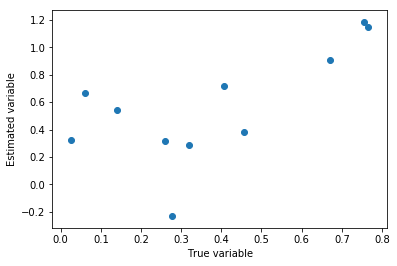

In [19]:

y_calc=pd.DataFrame({'y_calc':y_calc})
#y_old=pd.DataFrame({'y_old':y_old})
Y_OLD=pd.DataFrame(Y_OLD)
Y_OLD.columns = ["y_calc"]
y_calc=Original(y_calc,Y_OLD)

y_obs.columns = ["y_calc"]
y_obs=Original(y_obs,Y_OLD)
y_obs_train=np.copy(y_obs)
y_calc_train=np.copy(y_calc)

plt.scatter(y_obs,y_calc)
plt.xlabel("True variable")
plt.ylabel("Estimated variable")
#plt.xlim((0,1))
#plt.ylim((0,1))
plt.show()
#'''

In [20]:
print(y_obs)

      y_calc
0   0.277668
3   0.059762
5   0.406632
6   0.756413
14  0.320600
22  0.671598
30  0.766276
41  0.457632
42  0.141441
43  0.026423
51  0.260975


In [0]:
y_calc_test=ANN_ycal(syn0,syn1,x_test)
y_calc_test=pd.DataFrame({'y_calc':y_calc_test})
y_calc_test=Original(y_calc_test,Y_OLD)

In [22]:
y_obs_test=y_test
y_obs_test.columns = ["y_calc"]
y_obs_test=Original(y_obs_test,Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


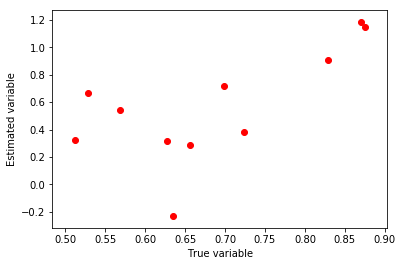

In [23]:
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

#plt.xlim((0,1.5))
#plt.ylim((0,1.5))
plt.show()

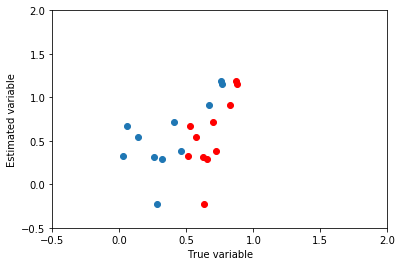

In [24]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

plt.xlim((-0.5,2))
plt.ylim((-0.5,2))
plt.show()

In [25]:
y_calc_test

,y_calc
0,-0.231795
1,0.664898
2,0.717800
3,1.184565
4,0.289409
5,0.910572
6,1.148461
7,0.384899
8,0.541924
9,0.322592
